Outline:

1. Forward Pass
2. Compute Loss
3. Update Weights
4. Train

In [1]:
import data_loader_two_by_two as dat
import nn_framework.activation as activation
import nn_framework.framework as framework
import nn_framework.error_fun as error_fun
import nn_framework.layer as layer
#from autoencoder_viz import Printer


In [2]:
# Import torch and a few submodules for convinience
import torch
import torch.nn as nn
import torch.nn.functional as F

# Import numpy for converting torch tensors to arrays that can be displayed
import numpy as np

# Import pyplot to plot things
from matplotlib import pyplot as plt

To start we will recreate our model from the previous lesson.
This is a 3 layer model for which we hardcoded the weights.

In [3]:
def forward(x):
    
    # Flatten
    x = torch.flatten(x)
    
    # Define fc1
    fc1 = nn.Linear(4, 4, bias = False)
    fc1.weight.data = torch.Tensor([[1, 0, 1, 0],
                                    [0, 1, 0, 1],
                                    [1, 0, -1, 0],
                                    [0, 1, 0, -1],])
    # Apply fc1
    x = fc1(x)
    # Apply activation function to output of fc1
    x = torch.tanh(x)
    
    # Define fc2
    fc2 = nn.Linear(4, 4, bias = False)
    fc2.weight.data = torch.Tensor([[1, 1, 0, 0],
                                    [-1, 1, 0, 0],
                                    [0, 0, 1, -1],
                                    [0, 0, 1, 1]])
    # Apply fc2
    x = fc2(x)
    # Apply activation function to output of fc2
    x = torch.tanh(x)
    xfc2 = x
    
    # Output layer
    fc3 = nn.Linear(4, 8, bias = False)
    fc3.weight.data = torch.Tensor([[1, 0, 0, 0],
                                    [-1, 0, 0, 0],
                                    [0, 1, 0, 0],
                                    [0, -1, 0, 0],
                                    [0, 0, 1, 0],
                                    [0, 0, -1, 0],
                                    [0, 0, 0, 1],
                                    [0, 0, 0, -1]])

    x = fc3(x)
    x = F.relu(x)
    
    return x
    

In [4]:
def label_map(x):
    
    cls = list(x).index(max(x))
    
    if cls == 0 or cls == 1:
        return "solid"
    if cls == 2 or cls == 3:
        return "vertical"
    if cls == 4 or cls == 5:
        return "diagonal"
    if cls == 6 or cls ==7:
        return "horizontal"

diagonal


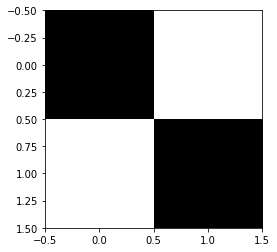

In [7]:
image = x = [[-1, 1], 
             [1, -1]]
x = torch.Tensor(x)
x = forward(x)
cls = label_map(np.array(x.detach()))

print(cls)
plt.imshow(image, cmap='gray')
plt.show()


Our ultimate goal is to have the model learn the weights, rather than having to hardcode them. <br>
We'll redifine our same model but we'll leave the weights with their random initialization